# Tectonics and Landscape Evolution Project
Create a synthetic landscape to represent Teton normal fault region

## Required imports

In [16]:
import pandas as pd
from landlab import RasterModelGrid, imshow_grid
from landlab.components import StreamPowerEroder, LinearDiffuser, FlowAccumulator,NormalFault
import numpy as np
import matplotlib.pyplot as plt
from FieldWork_class import FieldWork

## Initialise the landscape and parameters

In [ ]:
#Import you field work data
data = pd.read_csv('/Users/poliveira/Projects_PhD/tect_land_project/field_work_tatun_park.csv')
data

#Calculate parameters for your model
fw = FieldWork(data)
result = fw.calculate_dip_strike()

#Set the size of your area
w = 1000
l  = 1000
cell_resolution = 30

rows,cols = fw.calculate_grid_size(w,l,cell_resolution) 

#create basin_mg
basin_mg = RasterModelGrid((rows,cols),10)

In [ ]:

#####run to steady state- fake model 

basin_mg.set_closed_boundaries_at_grid_edges(True, True, False, True)

z = basin_mg.add_zeros('topographic__elevation', at='node')
z += np.random.rand(z.size)

# Dictionary for parameter values
param  = {'stream_power': {'K_sp': 0, 
                        'n_sp': 1, 
                        'm_sp': 0.5}, 
                        'diffuser': {'D_diff': 0.001}}

K_sp = param['stream_power']['K_sp']
m_sp = param['stream_power']['m_sp']
n_sp = param['stream_power']['n_sp']

# Forward model parameters

n_steps = 1000
dt = 10.0  # timestep, kyr

U = np.ones(basin_mg.number_of_nodes)
uplift_rate = 0.00005
U = U*uplift_rate

fa = FlowAccumulator(basin_mg, flow_director='D8')
ld = LinearDiffuser(basin_mg, linear_diffusivity=param['diffuser']['D_diff'])
sp = StreamPowerEroder(basin_mg, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp)

uplift_per_steps = dt * U

## Forward model evolution

In [ ]:
for i in range(n_steps):

    basin_mg.at_node['topographic__elevation'][basin_mg.core_nodes] += uplift_per_steps[basin_mg.core_nodes]
    fa.run_one_step()
    sp.run_one_step(dt=dt)
    ld.run_one_step(dt)

    if i%100 == 0:
        imshow_grid(basin_mg, 'topographic__elevation')
        plt.show()

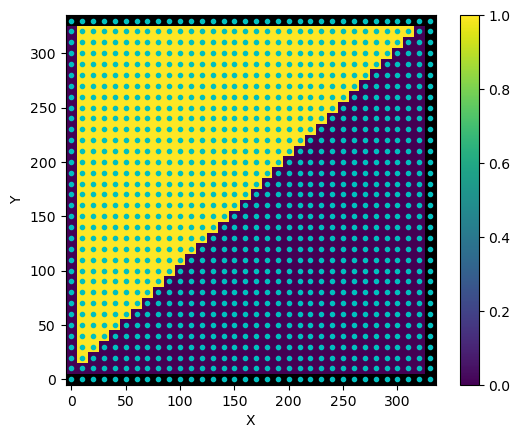

In [21]:
##introducing the normal fault

grid = RasterModelGrid((6, 6), xy_spacing=10)

grid.add_zeros("topographic__elevation", at="node")

nf = NormalFault(basin_mg)

plt.figure()
imshow_grid(basin_mg, nf.faulted_nodes.astype(int), cmap="viridis")
plt.plot(basin_mg.x_of_node, basin_mg.y_of_node, "c.")
plt.show()


##test normla fault 